# CMSC320: Checkpoint 2
Tyshon Brown, David Li, Zile Liu, and Samuel Opoku-Agyemang


## Data Pre-Processing

### Imports

In [60]:
import pandas as pd
import numpy as np

import json

from census import Census
#from us import states

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# sam's API key: 23c580dcbb047d99e93502f60681fc6430f2fc9a
c = Census("23c580dcbb047d99e93502f60681fc6430f2fc9a", year = 2020)


### Population

In [61]:
population_data = c.acs5.state(('NAME', 'B01003_001E'), Census.ALL)
population = pd.DataFrame(population_data)
population.rename(columns={'NAME': 'Name', 'B01003_001E': 'Population'}, inplace=True)
population['Population'] = population['Population'].astype(int)

population = population.drop('state', axis=1)
population.head()

,Name,Population
0,Pennsylvania,12794885
1,California,39346023
2,West Virginia,1807426
3,Utah,3151239
4,New York,19514849


### Population Density

In [62]:
# https://www.census.gov/data/tables/time-series/dec/density-data-text.html
# renamed from "apportionment.csv"
pop_density = pd.read_csv("population_density.csv")
pop_density = pop_density[['Name', 'Geography Type', 'Year', 'Resident Population Density']]
pop_density = pop_density[(pop_density['Year'] == 2020) & (pop_density['Geography Type'] == "State")]
pop_density = pop_density[['Name', 'Resident Population Density']].reset_index(drop = True)

# 52 datapoints because DC and Puerto Rico count as states
pop_density.head()

,Name,Resident Population Density
0,Alabama,99.2
1,Alaska,1.3
2,Arizona,62.9
3,Arkansas,57.9
4,California,253.7


### Median Age

In [63]:
median_age_dictionary = c.acs5.state(('NAME', 'B01002_001E'), Census.ALL)
median_age = pd.DataFrame.from_dict(median_age_dictionary).rename(columns = {'NAME' : 'Name', 'B01002_001E' : 'Median Age'})
median_age = median_age[['Name', 'Median Age']].sort_values(by = ['Name']).reset_index(drop = True)
median_age.head()


,Name,Median Age
0,Alabama,39.2
1,Alaska,34.6
2,Arizona,37.9
3,Arkansas,38.3
4,California,36.7


### Median Income

In [64]:
median_income_dictionary = c.acs5.state(('NAME', 'B19013_001E'), Census.ALL)
median_income = pd.DataFrame.from_dict(median_income_dictionary).rename(columns = {'NAME' : 'Name', 'B19013_001E' : 'Median Household Income'})
median_income = median_income[['Name', 'Median Household Income']].sort_values(by = ['Name']).reset_index(drop = True)
median_income.head()

,Name,Median Household Income
0,Alabama,52035.0
1,Alaska,77790.0
2,Arizona,61529.0
3,Arkansas,49475.0
4,California,78672.0


### Popular Vote

In [65]:
# https://www.fec.gov/introduction-campaign-finance/election-results-and-voting-information/federal-elections-2020/
popular_vote = pd.read_csv("federalelections2020.csv")
popular_vote.head()

,Name,Biden Votes,Trump Votes,Total Votes
0,Alabama,849624,1441170,2323282
1,Alaska,153778,189951,359530
2,Arizona,1672143,1661686,3387326
3,Arkansas,423932,760647,1219069
4,California,11110639,6006518,17501380


## Funding

In [ ]:
## Source: https://www.fec.gov/resources/campaign-finance-statistics/2020/tables/ie/IE2_2020_24m.pdf
independent_expenditure = pd.read_csv("candidates_funding.csv")
independent_expenditure = independent_expenditure.sort_values(by = ['Total IEs For'], ascending=False)
independent_expenditure.index = range(0, len(independent_expenditure) )
independent_expenditure.head()



,Candidate,Total IEs For,Total IEs Against
0,"Biden, Joseph R Jr",383204094,299388312
1,"Trump, Donald J.",53500635,308135887
2,"Warren, Elizabeth",14996979,18965
3,"Buttigieg, Pete",3668912,30862
4,"Klobuchar, Amy J.",2711204,101
5,"Patrick, Deval",2367169,0
6,"Inslee, Jay R",1780488,0
7,"Sanders, Bernard",1417958,6221201
8,"Booker, Cory A.",954411,1172
9,"Yang, Andrew",719077,296


In [ ]:
state_contributions = pd.read_csv("state_spending.csv")
state_contributions = state_contributions.rename(columns = {"State (or District)" : "Name"}).drop(columns = ['Rank'])
state_contributions["Total Contributions"] = state_contributions['Total Contributions'].str.replace("$", "").astype(int)
state_contributions["Percent to Democrats"] = state_contributions['Percent to Democrats'].str.replace("%", "").astype(float) / 100
state_contributions["Percent to Republicans"] = state_contributions['Percent to Republicans'].str.replace("%", "").astype(float) / 100
state_contributions['Contributions to Democrats'] = state_contributions['Total Contributions'] * state_contributions["Percent to Democrats"]
state_contributions['Contributions to Republicans'] = state_contributions["Total Contributions"] * state_contributions["Percent to Republicans"]
state_contributions.head()

,Name,Total Contributions,Percent to Democrats,Percent to Republicans,Contributions to Democrats,Contributions to Republicans
0,California,1666572970,0.6931,0.2842,1.155102e+09,4.736400e+08
1,New York,978988661,0.7462,0.2318,7.305213e+08,2.269296e+08
2,District of Columbia,810155426,0.6701,0.3148,5.428852e+08,2.550369e+08
3,Texas,687622660,0.3488,0.6315,2.398428e+08,4.342337e+08
4,Florida,646468276,0.3692,0.6108,2.386761e+08,3.948628e+08
5,Illinois,465554870,0.6578,0.3308,3.062420e+08,1.540056e+08
6,Virginia,428059006,0.5293,0.4483,2.265716e+08,1.918989e+08
7,Massachusetts,345536126,0.8376,0.1402,2.894211e+08,4.844416e+07
8,Nevada,325134020,0.3101,0.6732,1.008241e+08,2.188802e+08
9,Washington,273199705,0.7454,0.2294,2.036431e+08,6.267201e+07


## Hypothesis Testing

*Likely just going to focus on either the 2020 presidential election because the FEC data for Trump's 2024 campaign is unclean, scattered, and not even on the main page as it was in previous elections.*

Electoral college and popular vote numbers by state: https://www.fec.gov/resources/cms-content/documents/2024presgeresults.pdf

**ideas**
- how does median age correlate with funding/spending
- how does population density correlate spending / voter turnout
- how does median income correlate with chosen candidate

### Median Age and Party-Based Spending
*How does median age correlate with funds raised?* \
*Did Republican candidates receive a disproportion amount of funding from states with a higher median age?*

Statistical Methods Used:
- ANOVA One-Way
- Tukey's Honest Significant Difference (Post-Hoc)

In [75]:
from scipy.stats import f_oneway

joint_df = pd.merge(left = median_age, right = state_contributions, how = "inner")
joint_df = pd.merge(left = joint_df, right = population, how = "inner")
joint_df.insert(2, "Age Group", pd.qcut(joint_df['Median Age'], q = 3, labels = ['Lower', "Medium", 'Higher']))


lower = joint_df[joint_df['Age Group'] == 'Lower']['Percent to Republicans']
medium = joint_df[joint_df['Age Group'] == 'Medium']['Percent to Republicans']
higher = joint_df[joint_df['Age Group'] == 'Higher']['Percent to Republicans']

statistic, p_value = f_oneway(lower, medium, higher)
print(f"ANOVA statistic:{statistic:.4f}, ANOVA p_value: {p_value:.4f}")
# singificant, so we proceed with a post-hoc Tukey's Honest Significant Difference

import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(joint_df['Percent to Republicans'], joint_df['Age Group'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

ANOVA statistic:5.3387, ANOVA p_value: 0.0081


group1,group2,meandiff,p-adj,lower,upper,reject
Higher,Lower,0.1779,0.0063,0.0445,0.3112,True
Higher,Medium,0.1137,0.1085,-0.0196,0.2471,False
Lower,Medium,-0.0641,0.4806,-0.1975,0.0692,False


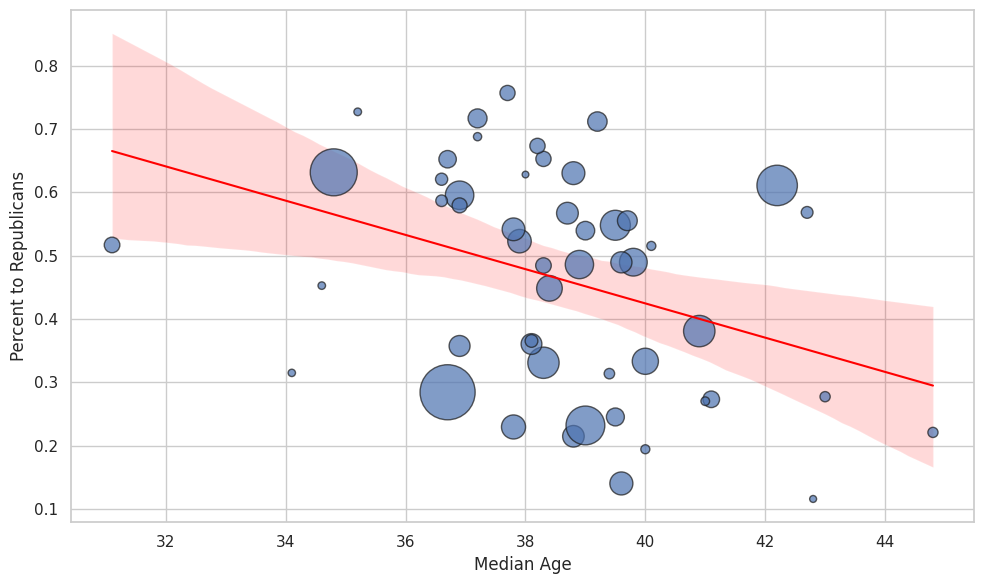

In [69]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Regression Line
sns.regplot(data=joint_df, x='Median Age', y='Percent to Republicans', scatter=False, color='red', line_kws={'linewidth':1.5})

# Scatter Plot
plt.scatter(
    x=joint_df['Median Age'],
    y=joint_df['Percent to Republicans'],
    s=joint_df['Population'] / 25000,
    alpha=0.7,
    edgecolor='k'
)
plt.tight_layout()
plt.show()

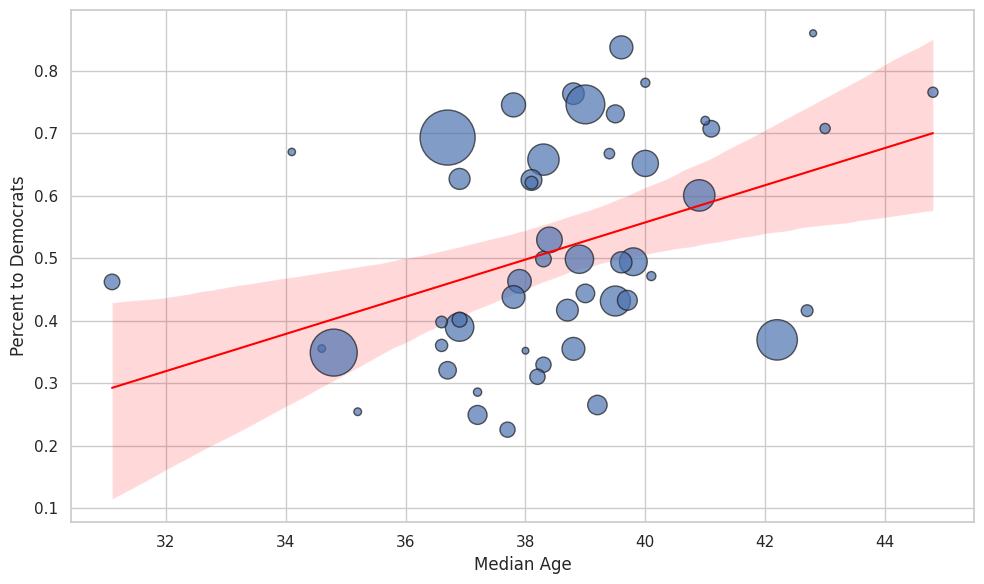

In [70]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Regression Line
sns.regplot(data=joint_df, x='Median Age', y='Percent to Democrats', scatter=False, color='red', line_kws={'linewidth':1.5})

# Scatter Plot
plt.scatter(
    x=joint_df['Median Age'],
    y=joint_df['Percent to Democrats'],
    s=joint_df['Population'] / 25000,
    alpha=0.7,
    edgecolor='k'
)
plt.tight_layout()
plt.show()

**Observations:**
- We can see that as median age increases, the Democrats receive more funding and the Republicans receive less funding.
- This is corroborated by our ANOVA p-value of 0.0081.

### Population Density and Voter Turnout
*How does population density correlate with voter turnout?* \
*Do denser areas have more engaged voters?*

Statistical Methods Used:
- Simple Linear Regression
- Pearson and Spearman Correlation Analysis

**Turnout Rate:**

In [71]:
merged_pop_df = popular_vote.merge(population, on='Name')
merged_pop_df['Turnout'] = merged_pop_df['Total Votes'] / merged_pop_df['Population']

#popular_vote['Turnout'] = popular_vote['Total Votes'] / population['Population']
merged_pop_df.head(5)

,Name,Biden Votes,Trump Votes,Total Votes,Population,Turnout
0,Alabama,849624,1441170,2323282,4893186,0.474799
1,Alaska,153778,189951,359530,736990,0.487836
2,Arizona,1672143,1661686,3387326,7174064,0.472163
3,Arkansas,423932,760647,1219069,3011873,0.404754
4,California,11110639,6006518,17501380,39346023,0.444807


**Combining** DF's for Visualization:

In [72]:
# merging Popular Vote and Population Density and Population
density_turnout = merged_pop_df.merge(pop_density, on='Name')

# Calculating turnout and adding it to the df
density_turnout['Turnout'] = density_turnout['Total Votes'] / density_turnout['Population'] * 100
density_turnout['Resident Population Density'] = pd.to_numeric(density_turnout['Resident Population Density'], errors='coerce')

# Dropping Na's
density_turnout = density_turnout.dropna(subset=['Resident Population Density', 'Turnout'])

density_turnout.head()

,Name,Biden Votes,Trump Votes,Total Votes,Population,Turnout,Resident Population Density
0,Alabama,849624,1441170,2323282,4893186,47.479945,99.2
1,Alaska,153778,189951,359530,736990,48.783566,1.3
2,Arizona,1672143,1661686,3387326,7174064,47.216278,62.9
3,Arkansas,423932,760647,1219069,3011873,40.475445,57.9
4,California,11110639,6006518,17501380,39346023,44.480684,253.7


The Plot:
- x-axis: Population Density
- y-axis: Voter Turnout
- blue dots/points: scaled to the population size
- red regression line

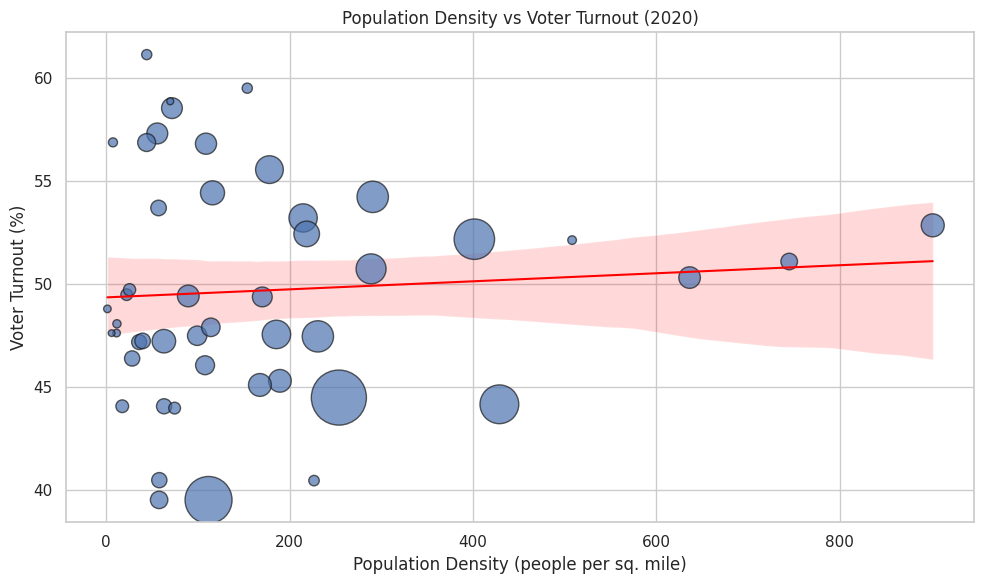

Pearson correlation: 0.070, p-value: 0.636
Spearman correlation: 0.051, p-value: 0.733


In [73]:

from scipy.stats import pearsonr, spearmanr

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Regression Line
sns.regplot(data=density_turnout, x='Resident Population Density', y='Turnout', scatter=False, color='red', line_kws={'linewidth':1.5})


# Scatter Plot
plt.scatter(
    x=density_turnout['Resident Population Density'],
    y=density_turnout['Turnout'],
    s=density_turnout['Population'] / 25000,
    alpha=0.7,
    edgecolor='k'
)

plt.xlabel("Population Density (people per sq. mile)")
plt.ylabel("Voter Turnout (%)")
plt.title("Population Density vs Voter Turnout (2020)")
plt.tight_layout()
plt.show()

# Pearson Correlation
p_corr, p_p = pearsonr(density_turnout['Resident Population Density'], density_turnout['Turnout'])
print(f"Pearson correlation: {p_corr:.3f}, p-value: {p_p:.3g}")

# Spearman Correlation
s_corr, s_p = spearmanr(density_turnout['Resident Population Density'], density_turnout['Turnout'])
print(f"Spearman correlation: {s_corr:.3f}, p-value: {s_p:.3g}")

**Observations:**
- Visualization: In most of the cases where the voter turnout is high, the population density is on the lower side. But it is also the same for the low voter turnout
- Pearson Correlation: A 0.070 shows that there is a very **weak** positive linear correlation.
- Spearman Correlation: A 0.051 shows that there is also a very **weak** positive correlation
- Both p-values are large (> 0.05) so they are insignificant

**Conclusion**

The analysis shows that there is **no significant correlation** between population density and voter turnout across the states. Both the Pearson and Spearman correlation values are close to zero. The visualization also shows no clear pattern between population density and voter turnout.

### Median Income and Funding/Spending
*Do wealthier states contribute disproportionately more to campaigns?*
*Do poorer states receive more campaign spending?*

In [74]:
# if we choose to compare all three, it could be x-axis income, y-axis spending, and dot color candidate

### Campaign Spending and Chosen Candidate
*Does increased spending always lead to more votes?*

### Conclusions

**How does median age correlate with campaign spending?**

[insert here]

**How does population density correlate with voter turnout?**

The analysis shows that there is **no significant correlation** between population density and voter turnout across the states. Both the Pearson and Spearman correlation values are close to zero. The visualization also shows no clear pattern between population density and voter turnout.

**Do wealthier states contribute disproportionately more to campaigns? Do poorer states receive more campaign spending?**

[insert here]
